<a href="https://colab.research.google.com/github/FahmidAhmed1/California-House-Cost-Analysis/blob/main/Data_Science_Project_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the necessary libaries  HAVENT IMPORTED SKYKITLEARN!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Change the path when putting on Jupiter, select copy path
path = "/content/drive/MyDrive/Housing.csv"
df = pd.read_csv(path)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.info()
# There are missing values and are not all the same amount

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# Droping the blank values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
# Preparing the data for the model, need to split the data into 80/20 ratio for training/testing
from sklearn.model_selection import train_test_split
x = df.drop(['median_house_value'], axis =1)
y = df['median_house_value']
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
test_data = x_test.join(y_test)
train_data = x_train.join(y_train)
# The training portion has 80% of the data
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
335,-122.18,37.74,35.0,504.0,126.0,323.0,109.0,1.8438,NEAR BAY,90500.0
2930,-119.00,35.36,39.0,896.0,217.0,805.0,197.0,1.2500,INLAND,42500.0
307,-122.18,37.77,52.0,2744.0,547.0,1479.0,554.0,2.2768,NEAR BAY,96200.0
9129,-118.08,34.56,14.0,5144.0,887.0,2846.0,824.0,4.5615,INLAND,137200.0
11423,-117.97,33.71,26.0,2553.0,405.0,1337.0,411.0,5.3737,<1H OCEAN,252900.0
...,...,...,...,...,...,...,...,...,...,...
5311,-118.43,34.06,41.0,1463.0,267.0,601.0,267.0,5.3777,<1H OCEAN,500001.0
16090,-122.48,37.72,45.0,1405.0,338.0,733.0,342.0,4.1116,NEAR OCEAN,187500.0
15372,-117.24,33.38,16.0,2792.0,525.0,1696.0,516.0,3.6680,<1H OCEAN,171200.0
4354,-118.39,34.10,30.0,6310.0,957.0,1776.0,880.0,8.9440,<1H OCEAN,500001.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

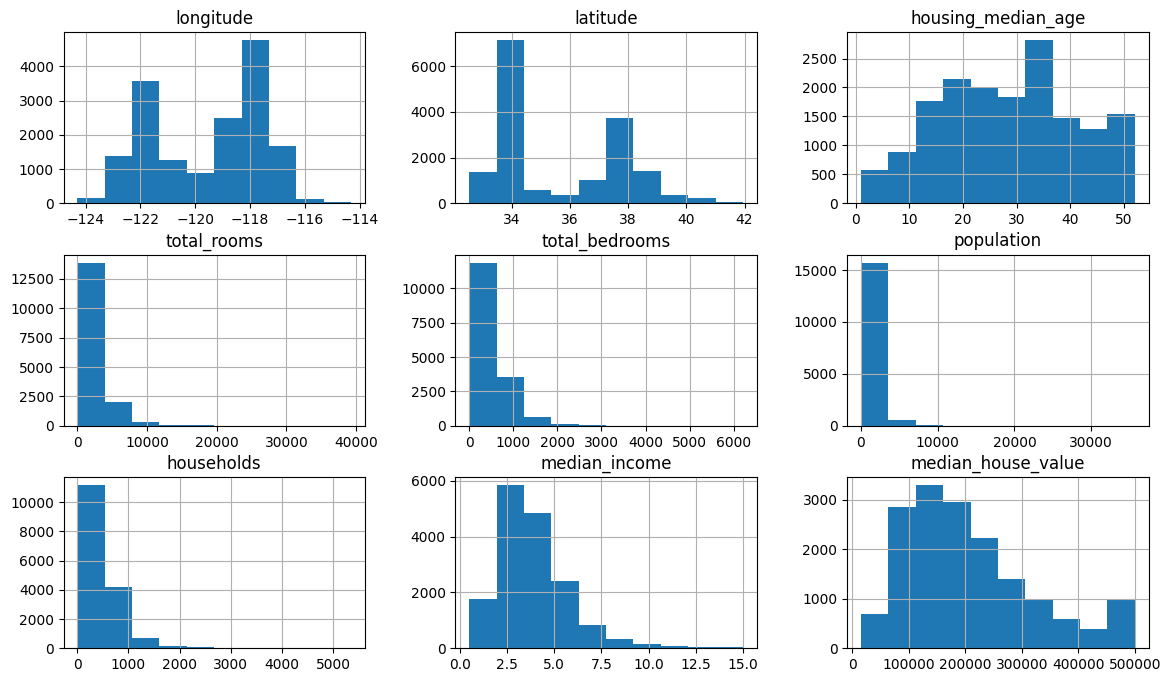

In [ ]:
train_data.hist(figsize= (14,8))

<ipython-input-6-c70dff78aae9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap="YlOrRd")


<Axes: >

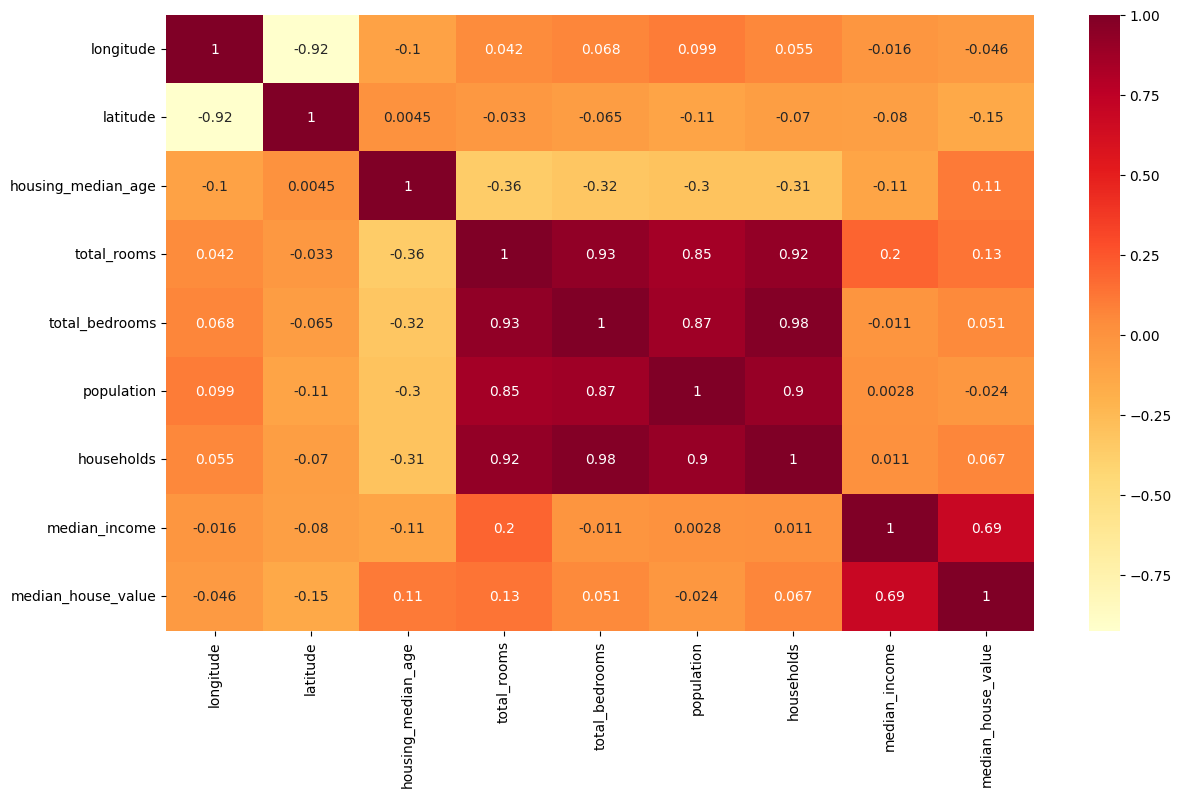

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(), annot = True, cmap="YlOrRd")

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

In [ ]:
# Checking all the unique values from the Ocean Proximity variable since it is a categorical variable
train_data.ocean_proximity.value_counts()

<1H OCEAN     7266
INLAND        5162
NEAR OCEAN    2101
NEAR BAY      1814
ISLAND           3
Name: ocean_proximity, dtype: int64

In [ ]:
test_data.ocean_proximity.value_counts()

<1H OCEAN     1768
INLAND        1334
NEAR OCEAN     527
NEAR BAY       456
ISLAND           2
Name: ocean_proximity, dtype: int64

In [ ]:
# Using the python get dummies libary to use One-Hot Encoding technique which allows the data to convert from a categorical to numeric value
pd.get_dummies(train_data.ocean_proximity)

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, prefix=''))
train_data = train_data.drop(['ocean_proximity'], axis =1)
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
335,-122.18,37.74,35.0,6.224558,4.844187,5.780744,4.700480,1.8438,90500.0,0,0,0,1,0
2930,-119.00,35.36,39.0,6.799056,5.384495,6.692084,5.288267,1.2500,42500.0,0,1,0,0,0
307,-122.18,37.77,52.0,7.917536,6.306275,7.299797,6.318968,2.2768,96200.0,0,0,0,1,0
9129,-118.08,34.56,14.0,8.545781,6.788972,7.954021,6.715383,4.5615,137200.0,0,1,0,0,0
11423,-117.97,33.71,26.0,7.845416,6.006353,7.198931,6.021023,5.3737,252900.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5311,-118.43,34.06,41.0,7.288928,5.590987,6.400257,5.590987,5.3777,500001.0,1,0,0,0,0
16090,-122.48,37.72,45.0,7.248504,5.826000,6.598509,5.837730,4.1116,187500.0,0,0,0,0,1
15372,-117.24,33.38,16.0,7.934872,6.265301,7.436617,6.248043,3.6680,171200.0,1,0,0,0,0
4354,-118.39,34.10,30.0,8.750049,6.864848,7.482682,6.781058,8.9440,500001.0,1,0,0,0,0


<Axes: >

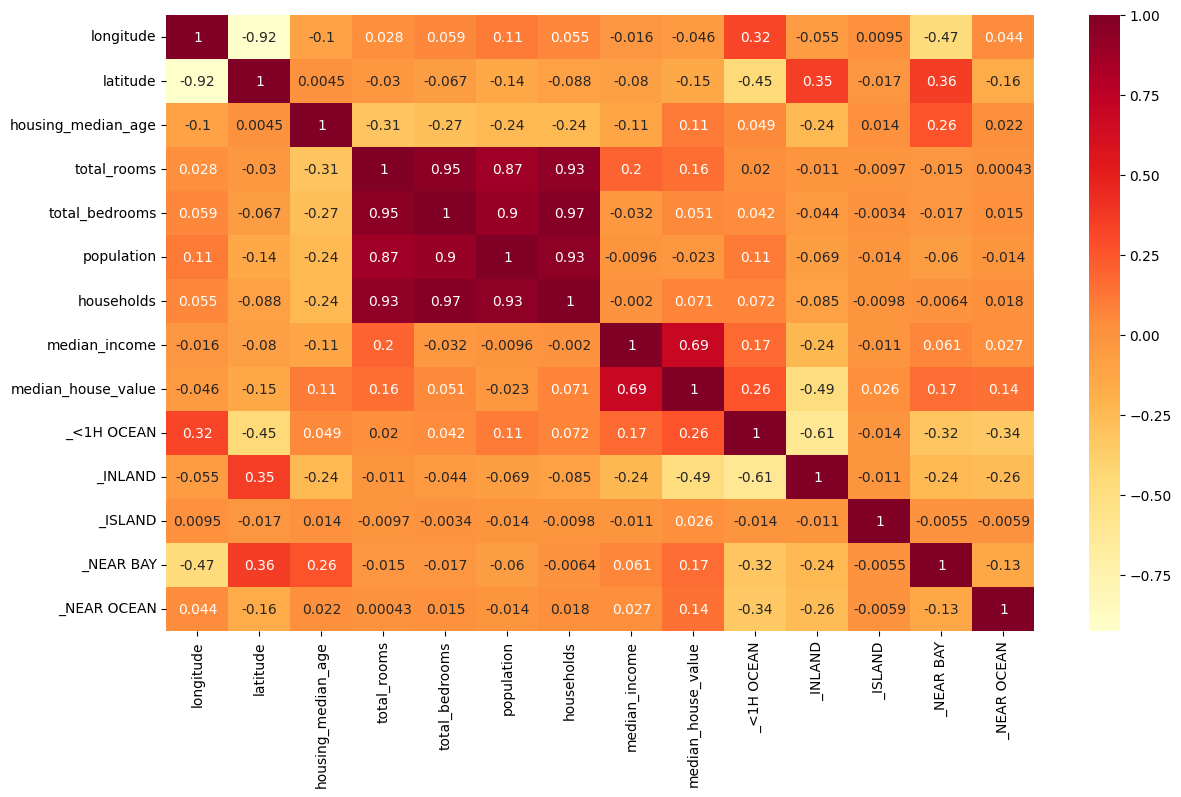

In [ ]:
# Ensuring the new features have value and the correlation between other features using the seaborn libary
plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(), annot = True, cmap="YlOrRd")

<Axes: xlabel='latitude', ylabel='longitude'>

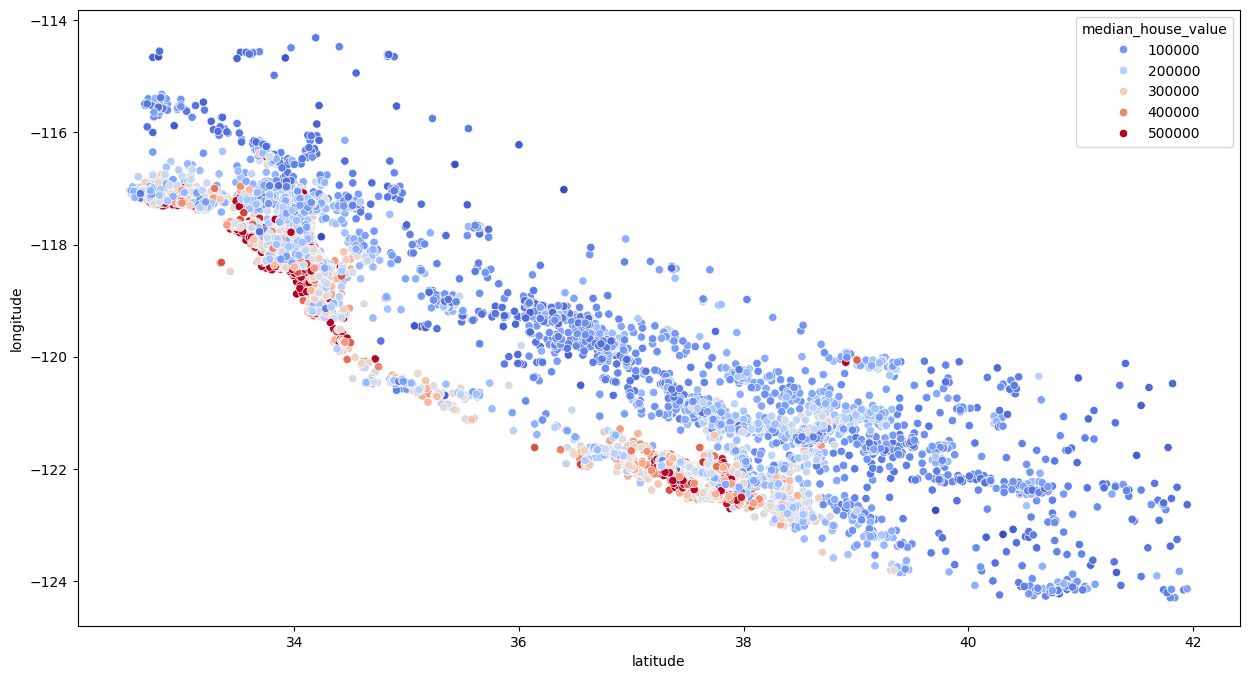

In [ ]:
# Displaying a scatter plot using the seaborn libary to visualize the relationship between location and price (mapping out the Calafornia state).
plt.figure(figsize = (15,8))
# The latitude and longitude variables are used to plot with the median house prices. Locations with higher prices are highlighted in Red, while those with lower prices are highlighted in Blue.
sns.scatterplot(x = "latitude", y = "longitude", data = train_data, hue = "median_house_value", palette= "coolwarm")

<Axes: >

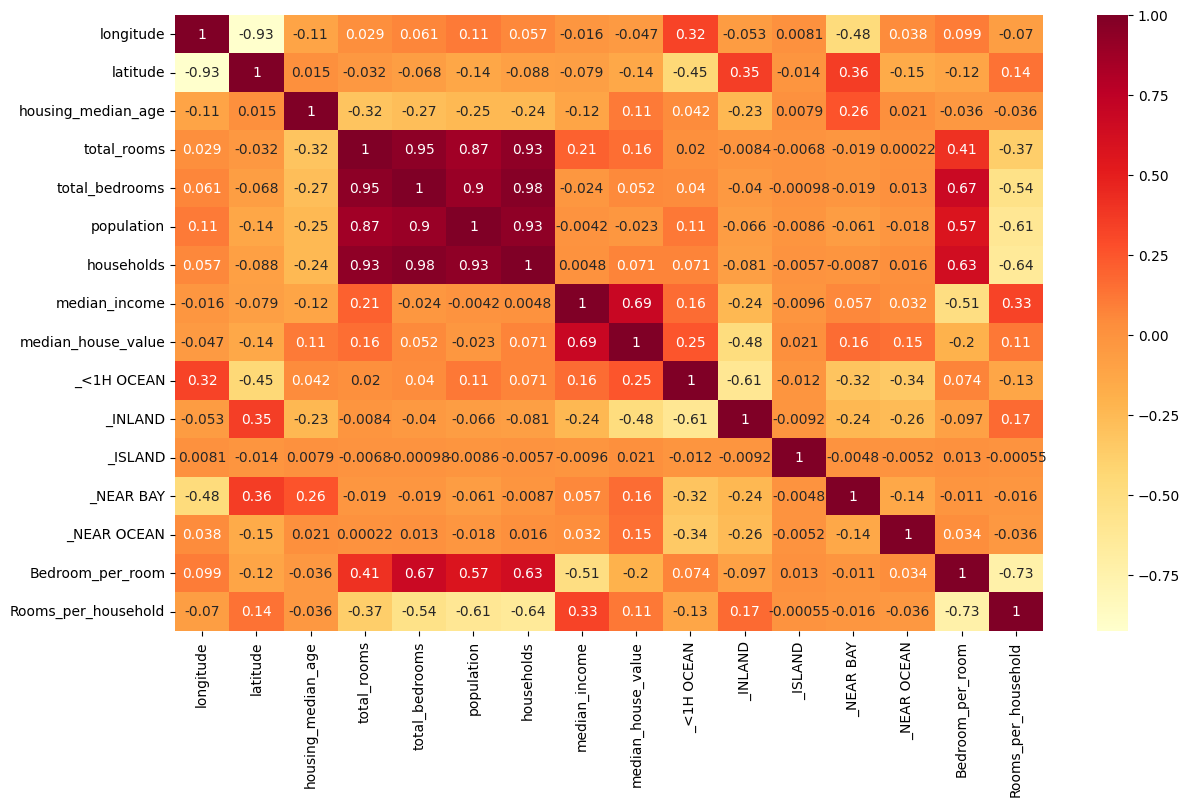

In [ ]:
# Feature engineering to create features that help provide further insights into our data
train_data["Bedroom_per_room"] = train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["Rooms_per_household"] = train_data["total_rooms"]/train_data["households"]
# Visualizing the correlation of variables
plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(), annot = True, cmap="YlOrRd")



In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,Bedroom_per_room,Rooms_per_household
335,-122.18,37.74,35.0,6.224558,4.844187,5.780744,4.700480,1.8438,90500.0,0,0,0,1,0,0.778238,1.324239
2930,-119.00,35.36,39.0,6.799056,5.384495,6.692084,5.288267,1.2500,42500.0,0,1,0,0,0,0.791947,1.285687
307,-122.18,37.77,52.0,7.917536,6.306275,7.299797,6.318968,2.2768,96200.0,0,0,0,1,0,0.796495,1.252979
9129,-118.08,34.56,14.0,8.545781,6.788972,7.954021,6.715383,4.5615,137200.0,0,1,0,0,0,0.794424,1.272568
11423,-117.97,33.71,26.0,7.845416,6.006353,7.198931,6.021023,5.3737,252900.0,1,0,0,0,0,0.765588,1.303004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5311,-118.43,34.06,41.0,7.288928,5.590987,6.400257,5.590987,5.3777,500001.0,1,0,0,0,0,0.767052,1.303692
16090,-122.48,37.72,45.0,7.248504,5.826000,6.598509,5.837730,4.1116,187500.0,0,0,0,0,1,0.803752,1.241665
15372,-117.24,33.38,16.0,7.934872,6.265301,7.436617,6.248043,3.6680,171200.0,1,0,0,0,0,0.789591,1.269977
4354,-118.39,34.10,30.0,8.750049,6.864848,7.482682,6.781058,8.9440,500001.0,1,0,0,0,0,0.784550,1.290366


In [ ]:
# Creating a model that uses linear regression using scikit learn libaray
from sklearn.linear_model import LinearRegression
# Split the data since the test data doesn't have the new features found in the training data

x_train, y_train = train_data.drop(["median_house_value"], axis =1), train_data["median_house_value"]
reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Running the test data set
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4760,-118.35,34.04,36.0,1956.0,601.0,1672.0,546.0,1.8685,<1H OCEAN,150700.0
17220,-119.72,34.47,34.0,3262.0,533.0,1265.0,502.0,5.8411,<1H OCEAN,381800.0
16206,-121.32,37.95,40.0,964.0,230.0,742.0,209.0,1.2625,INLAND,43000.0
16507,-121.11,37.74,11.0,3886.0,599.0,1605.0,529.0,4.4213,INLAND,182700.0
17783,-121.83,37.37,43.0,1461.0,284.0,800.0,258.0,3.2279,<1H OCEAN,182400.0
...,...,...,...,...,...,...,...,...,...,...
9771,-121.40,36.38,39.0,2288.0,529.0,1449.0,410.0,3.3289,<1H OCEAN,190600.0
17599,-121.89,37.31,47.0,2986.0,627.0,1399.0,613.0,3.7455,<1H OCEAN,247400.0
10121,-117.93,33.93,37.0,1128.0,273.0,931.0,234.0,2.8000,<1H OCEAN,137500.0
19836,-119.40,36.53,28.0,2201.0,429.0,1524.0,412.0,2.7500,INLAND,65000.0


In [ ]:

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

# One Hot encoding again to turn the ocean_proximity column into numeric values
#test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis = 1)
pd.get_dummies(test_data.ocean_proximity)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, prefix=''))
test_data = test_data.drop(['ocean_proximity'], axis =1)

# Feature engineering just like in the training data
test_data["Bedroom_per_room"] = test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["Rooms_per_household"] = test_data["total_rooms"]/test_data["households"]
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,Bedroom_per_room,Rooms_per_household
4760,-118.35,34.04,36.0,7.579168,6.400257,7.422374,6.304449,1.8685,150700.0,1,0,0,0,0,0.844454,1.202194
17220,-119.72,34.47,34.0,8.090402,6.280396,7.143618,6.220590,5.8411,381800.0,1,0,0,0,0,0.776277,1.300584
16206,-121.32,37.95,40.0,6.872128,5.442418,6.610696,5.347108,1.2625,43000.0,0,1,0,0,0,0.791955,1.285205
16507,-121.11,37.74,11.0,8.265393,6.396930,7.381502,6.272877,4.4213,182700.0,0,1,0,0,0,0.773941,1.317640
17783,-121.83,37.37,43.0,7.287561,5.652489,6.685861,5.556828,3.2279,182400.0,1,0,0,0,0,0.775635,1.311461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9771,-121.40,36.38,39.0,7.735870,6.272877,7.279319,6.018593,3.3289,190600.0,1,0,0,0,0,0.810882,1.285329
17599,-121.89,37.31,47.0,8.002025,6.442540,7.244228,6.419995,3.7455,247400.0,1,0,0,0,0,0.805114,1.246422
10121,-117.93,33.93,37.0,7.029088,5.613128,6.837333,5.459586,2.8000,137500.0,1,0,0,0,0,0.798557,1.287476
19836,-119.40,36.53,28.0,7.697121,6.063785,7.329750,6.023448,2.7500,65000.0,0,1,0,0,0,0.787799,1.277860


In [ ]:
x_test, y_test = test_data.drop(["median_house_value"], axis =1), test_data['median_house_value']

In [ ]:
# Printing out the score using linear regression and comparing model predictions to the labeled data
x =reg.score(x_test, y_test)
p =x*100

67.14965277639952

In [ ]:
# Use the Random Forest Regression Algorithum and check if it has any imporvements compared to Linear Regression
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
# Training the data
forest.fit(x_train,y_train)

# Analyzing the result
result = forest.score(x_test,y_test)
result*100

81.84811308477255

In [ ]:
# Overall, we can see with the Random Forest Regression Algorithum it has a much better accuracy than Linear Regression